Below is my implementation of the binary classification code used in class. This one in particular is for Question 5/2 where the orginal data set is used in it's entirity. Please see comments for quick code explantions.

In [104]:
#import same libraries as class example
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import math
from PIL import Image
from scipy import ndimage
%matplotlib inline

#import datasets
train_dataset = h5py.File("train_catvnoncat.h5", "r")  
test_dataset = h5py.File("test_catvnoncat.h5", "r")   

#create np arrays of the test/train data and "answers"
train_X = np.array(train_dataset["train_set_x"][:]) 
train_Y = np.array(train_dataset["train_set_y"][:]) 
test_X = np.array(test_dataset["test_set_x"][:]) 
test_Y = np.array(test_dataset["test_set_y"][:]) 

train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))

#Function for sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Function for computing improved weights and biases with logistic regression and gradient descent function
def propagate(learn_rate, w, b, X, Y):
    A = sigmoid(np.dot(w.T, X) + b)#take sigmoid of data with latest w and b values

   #perform backward propagation to find gradients of wrt w and b 
    dJdw = (1 / X.shape[1]) * np.dot(X, (A - Y).T)
    dJdb = (1 / X.shape[1]) * np.sum(A - Y)

    #gradient descent to fine new w and b 
    w -= learn_rate * dJdw
    b -= learn_rate * dJdb

    return w, b

train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T 
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T

X = train_X_flat
Y = train_Y
w = np.zeros((X.shape[0], 1)) #initalize w
b = 0 #initalize b
num_epochs = 10000 #number of iterations
learn_rate = 0.0005 #step size if gradient descent 

#repeat propagation function num_epochs times
for i in range(num_epochs):
    w, b = propagate(learn_rate, w, b, X, Y)

#sigmoid with final w and b, fitted to binary 1 or 0 for test data
A_test = sigmoid(np.dot(w.T, test_X_flat) + b)
test_predictions = (A_test >= .5).astype(int)

#sigmoid with final w and b, fitted to binary 1 or 0 for train data
A_train = sigmoid(np.dot(w.T, train_X_flat) + b)
train_predictions = (A_train >= .5).astype(int)

#finf accuracy of predictions and print
train_accuracy = np.mean(train_predictions == train_Y)
test_accuracy = np.mean(test_predictions == test_Y)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.97
Test Set Accuracy: 0.74


Indices of incorrect predictions:  [6, 10, 11, 13, 18, 19, 28, 29, 30, 33, 34, 44, 46]


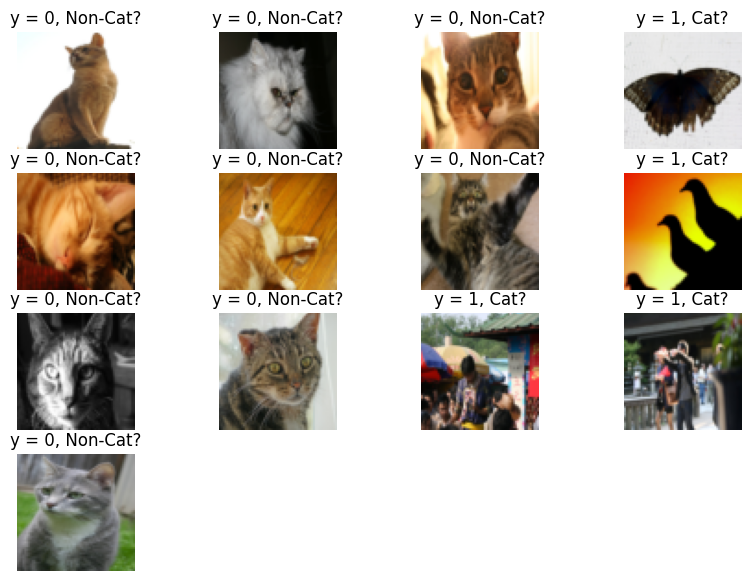

In [103]:
#subtract test predictions and test answers. 0=correct, 1=incorrect 
incorrect_tests = abs(test_predictions - test_Y) 

#go through each entry and add index to list if incorrect 
incorrect_indices = []
for i in range(len(incorrect_tests[0])):
    if incorrect_tests[0,i] == 1:
        incorrect_indices.append(i)

print("Indices of incorrect predictions: ", incorrect_indices)

#plots all incorrect predictions
fig = plt.figure(figsize=(10, 7))
for i in range(0, len(incorrect_indices)):
    fig.add_subplot(math.ceil(math.sqrt(len(incorrect_indices))), math.ceil(math.sqrt(len(incorrect_indices))), i+1) 
    plt.imshow(test_X[incorrect_indices[i]])
    plt.axis('off')
    if test_predictions[0, incorrect_indices[i]] == 1:
        plt.title("y = " + str(test_predictions[0, incorrect_indices[i]]) + ", Cat?")
    elif test_predictions[0, incorrect_indices[i]] == 0:
        plt.title("y = " + str(test_predictions[0, incorrect_indices[i]]) + ", Non-Cat?")
